In [1]:
import pandas as pd;
# Reading data from a csv file
pokemon = pd.read_csv("pokemon_data/Pokemon.csv")
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [2]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
# Grouping and aggregating data
# Show data types for every column
print(pokemon.dtypes)

numeric_column = pokemon.select_dtypes(include='number')
av_pokemon = numeric_column.groupby(pokemon['Type 1']).mean()
print(av_pokemon)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
                   #       Total         HP      Attack     Defense  \
Type 1                                                                
Bug       334.492754  378.927536  56.884058   70.971014   70.724638   
Dark      461.354839  445.741935  66.806452   88.387097   70.225806   
Dragon    474.375000  550.531250  83.312500  112.125000   86.375000   
Electric  363.500000  443.409091  59.795455   69.090909   66.295455   
Fairy     449.529412  413.176471  74.117647   61.529412   65.705882   
Fighting  363.851852  416.444444  69.851852   96.777778   65.925926   
Fire      327.403846  458.076923  69.903846   84.769231   67.769231   
Flying    677.750000  485.000000  70.750000   78.750000   66.250000   
Gho

In [5]:
numeric_column = pokemon.select_dtypes(include='number')
pokemon = numeric_column.groupby(pokemon['Type 1']).agg(["mean", "median", "std"])
print(pokemon)

                   #                          Total                     \
                mean median         std        mean median         std   
Type 1                                                                   
Bug       334.492754  291.0  210.445160  378.927536  395.0  117.875223   
Dark      461.354839  509.0  176.022072  445.741935  465.0  109.126217   
Dragon    474.375000  443.5  170.190169  550.531250  600.0  146.267538   
Electric  363.500000  403.5  202.731063  443.409091  477.5  105.721952   
Fairy     449.529412  669.0  271.983942  413.176471  405.0  123.781680   
Fighting  363.851852  308.0  218.565200  416.444444  455.0  102.464378   
Fire      327.403846  289.5  226.262840  458.076923  482.0  109.760496   
Flying    677.750000  677.5   42.437209  485.000000  557.5  161.400124   
Ghost     486.500000  487.0  209.189218  439.562500  464.5  110.072685   
Grass     344.871429  372.0  200.264385  421.142857  430.0  106.650626   
Ground    356.281250  363.5  204.89985

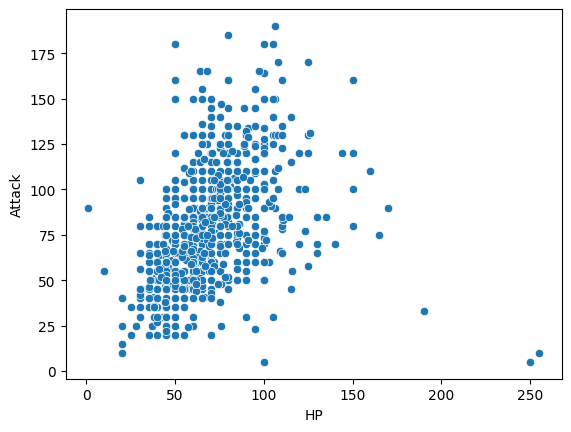

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot
sns.scatterplot(data=pokemon, x="HP", y="Attack", hue="Type 1")

# Menampilkan plot
plt.show()